
Linear Regression

Step 1: Import the required libraries and dataset

In [47]:
## Machine Learning : Linear Regression
# import the required libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
from numpy import *
from mpl_toolkits.mplot3d import Axes3D


In [48]:
#import the dataset by giving its path

data = pd.read_csv(r"C:\Users\it\Desktop\Shuja's Own\Python Projects\Linear Regression\data.csv", header = None)
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [49]:
mydata = data.to_numpy()
print(mydata.shape)
X = mydata[:,0]
Y = mydata[:,1]
print(X)
print(Y)

(97, 2)
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5

Step 2: Plotting Data

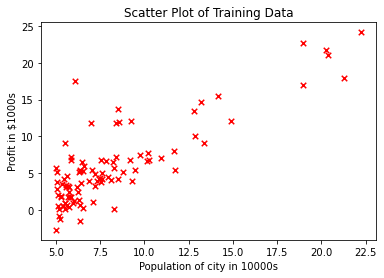

In [50]:
def plotdata(X,Y):
    # function for making a scatter plot of dataset
  plt.scatter(X, Y, color= "red", marker= "x", s=30)
  plt.xlabel('Population of city in 10000s') 
  plt.ylabel('Profit in $1000s') 
  plt.title('Scatter Plot of Training Data')
    
  return
 
plotdata(X,Y)  # function Call
plt.show() #show all figures


In [51]:
m = Y.size  #number of training examples 
X = np.stack([np.ones(m), X], axis=1) #convert X in to (97x2), first colum is all ones to get where theta is (2x1) "theta[0]+theta[1]*X"
print(X.shape)
print(X)

(97, 2)
[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1

Step 3: Computing cost

In [52]:
# cost function
def computeCost(X,y , theta):
  m = y.size
  J = 0    # cost initially set to zero
  h = np.dot(X, theta) # hypothesis of linear regression
  J = (1/(2*m))*np.sum(np.square(h-y)) # cost function
  return J

In [53]:

J = computeCost(X, Y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed =', J)
print('Expected cost value (approximately) 32.07\n')

With theta = [0, 0] 
Cost computed = 32.072733877455676
Expected cost value (approximately) 32.07



Step 4: Gradient Descent

In [55]:
#gradient descent algorithm
def gradientDescent(X, y, theta, alpha, num_iters):
  m = y.shape[0]  # m is the number of training examples
  theta = theta.copy()
  J_history = []
  
  for i in range(num_iters): # run recursively till the given number of iterations
    grad = (1/m)*(np.dot(X,theta)-Y).dot(X)
    theta = theta - alpha*grad
    J_history.append(computeCost(X, y, theta))  
  return theta, J_history


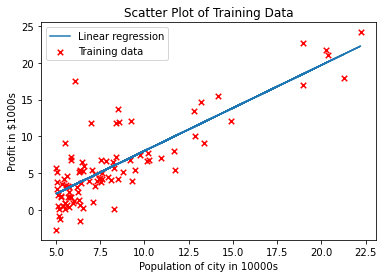

In [56]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings, no. of iterations and the learning rate
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,Y, theta, alpha, iterations) 
# plot the linear fit
plotdata(X[:, 1],Y) 
plt.plot(X[:, 1], np.dot(X, theta)) 
plt.legend([ 'Linear regression','Training data',]);


Fitting 2nd order polynomial

Producing 2D plots and contour Plots

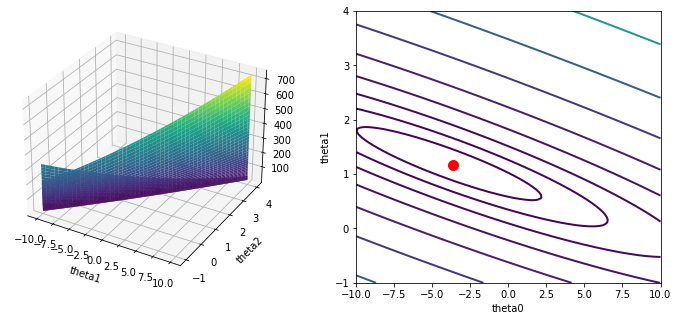

In [57]:
# grid over which J is calculated
t0 = np.linspace(-10, 10, 100) 
t1 = np.linspace(-1, 4, 100)

#initialize a J matrix of zeros
J_vals = np.zeros((t0.shape[0], t1.shape[0])) 

# Fill out J_vals
for i, theta0 in enumerate(t0): #assigns an index to each item in an iterable object that can be used to reference the item later
    for j, theta1 in enumerate(t1):
        J_vals[i, j] = computeCost(X,Y, [theta0, theta1])
        
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T #take transpose

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(t0, t1, J_vals, cmap='viridis')
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')


# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax2 = plt.subplot(122)
ax2.contour(t0, t1, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.plot(theta[0], theta[1], 'ro', ms=10, lw=2)

pass 

Step 5: Feature Normalization

In [68]:
# read the dataset from csv and convert into numpy arrays
mydata = data.to_numpy()
print(mydata.shape)
X = mydata[:,0]
Y = mydata[:,1]
print(X)
print(Y)

(97, 2)
[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5

In [69]:
# function to normalize the features
def  featureNormalize(X): 
  mu = np.mean(X) # mean  
  sigma = np.std(X) # standard deviation
  new = max(X) 
  print(size(X))
  X_norm = [ ]
  for i in range(size(X)):
    a = mu-X[i]
    b = a/sigma
    #c = X[i]/new
    X_norm.append(b)
    
  return X_norm, mu, sigma


97
97


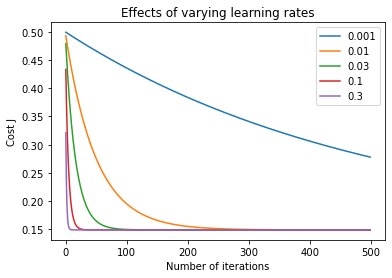

In [70]:
#normalize the features by passing their arrays as arguments to the function declared above

X, mu, sigma = featureNormalize(X)
Y, mu, sigma = featureNormalize(Y)

X = np.stack([np.ones(m), X], axis=1) 

# some gradient descent settings
iterations = 500
alpha = [0.001,0.01,0.03,0.1,0.3] #array of different learning rates
costs=[]

for i in range(5):
  theta = np.zeros(2)
  Y = np.array(Y) #convert Y list to an array
  theta, J_history = gradientDescent(X ,Y, theta, alpha[i], iterations) #call fn iteratively in a loop
          # initialize fitting parameters
  costs.append(J_history) #make an array of costs returned in every iteration
# Plot the convergence graph

for i in range(5):
  plt.plot(np.arange(len(costs[i])), costs[i], label=str(alpha[i])) #Return evenly spaced values within a given interval. (500 to the lowest cost) 
plt.xlabel('Number of iterations') #len(costs[i]) is 500 as we have 500 iterations above each returning a single value
plt.ylabel('Cost J')
plt.title('Effects of varying learning rates')
plt.legend()